In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [67]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


# Use the connection to extract SQL data
performance_df = pd.read_sql_query('SELECT * FROM studentsperformance', con=engine)

# Close the connection
engine.dispose()

In [3]:
performance_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

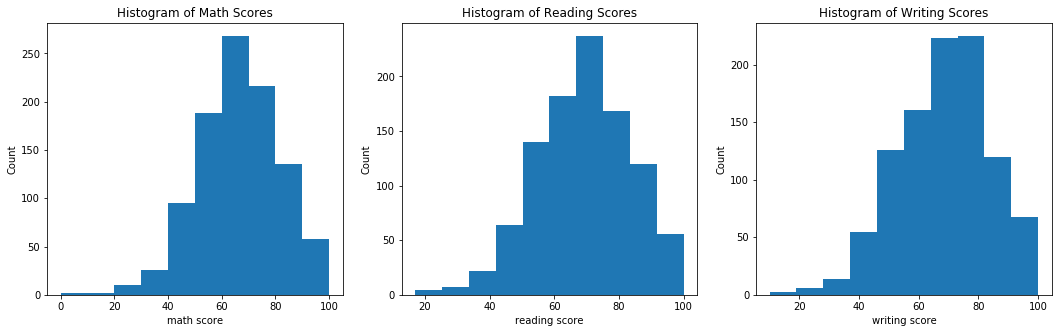

In [76]:
#Check if scores appear normally distributed
plt.figure(figsize=(18,5))

#Math
plt.subplot(1, 3, 1)
plt.hist(performance_df['math score'])
plt.title('Histogram of Math Scores')
plt.xlabel('math score')
plt.ylabel('Count')

#Reading
plt.subplot(1, 3, 2)
plt.hist(performance_df['reading score'])
plt.title('Histogram of Reading Scores')
plt.xlabel('reading score')
plt.ylabel('Count')

#Writing
plt.subplot(1, 3, 3)
plt.hist(performance_df['writing score'])
plt.title('Histogram of Writing Scores')
plt.xlabel('writing score')
plt.ylabel('Count')


plt.show()


In [77]:
#Use Jarque-Bera and Normality tests to determine if they are actually normal
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(np.sqrt(performance_df["math score"]))
norm_stats = normaltest(np.sqrt(performance_df["math score"]))

print("Math Scores: ")
print("Jarque-Bera test statistic: {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
print("Normality test statistic:    {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))

print('\n')

jb_stats = jarque_bera(np.sqrt(performance_df["reading score"]))
norm_stats = normaltest(np.sqrt(performance_df["reading score"]))

print("Reading Scores: ")
print("Jarque-Bera test statistic:   {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
print("Normality test statistic:     {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))

print('\n')

jb_stats = jarque_bera(np.sqrt(performance_df["writing score"]))
norm_stats = normaltest(np.sqrt(performance_df["writing score"]))

print("Writing Scores: ")
print("Jarque-Bera test statistic:  {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
print("Normality test statistic:     {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))



Math Scores: 
Jarque-Bera test statistic: 1233.479973;    p value: 0.0
Normality test statistic:    259.470356;    p value: 4.536574867826489e-57


Reading Scores: 
Jarque-Bera test statistic:   88.008335;    p value: 0.0
Normality test statistic:     70.423835;    p value: 5.101038001506264e-16


Writing Scores: 
Jarque-Bera test statistic:  141.637824;    p value: 0.0
Normality test statistic:     97.397009;    p value: 7.087745794883206e-22


Even though the histograms appear to be normally distributed, the p-values for both the Jarque-Bera and Normal tests from Scipy give values of 0 or very close to 0, which tells us that the distributions aren't actually normal.

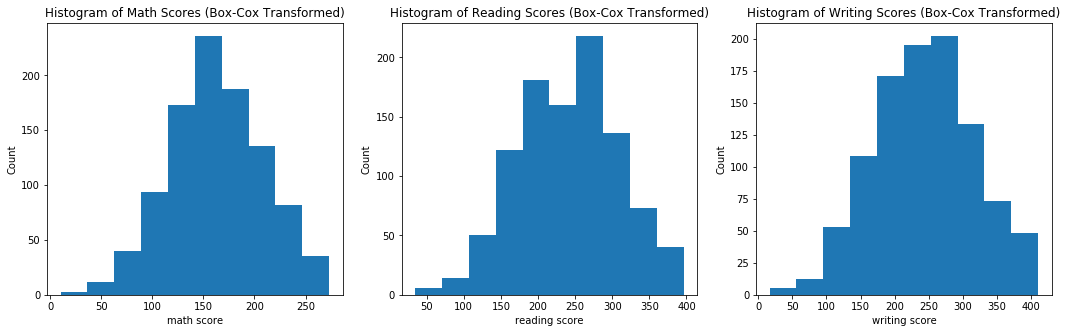

In [78]:
#Apply Box-Cox transformation
from scipy.stats import boxcox

math_boxcox,_ = boxcox(performance_df['math score'][performance_df['math score']>0])  #Box Cox has issues if any values are <=0
reading_boxcox,_ = boxcox(performance_df['reading score'][performance_df['reading score']>0])
writing_boxcox,_ = boxcox(performance_df['writing score'][performance_df['writing score']>0])

plt.figure(figsize=(18,5))

# Histograms of the Box-Cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("Histogram of Math Scores (Box-Cox Transformed)")
plt.xlabel('math score')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("Histogram of Reading Scores (Box-Cox Transformed)")
plt.xlabel('reading score')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("Histogram of Writing Scores (Box-Cox Transformed)")
plt.xlabel('writing score')
plt.ylabel('Count')

plt.show()

In [84]:
#Use Jarque-Bera and Normality tests to determine if they are actually normal now

jb_stats = jarque_bera(np.sqrt(math_boxcox))
norm_stats = normaltest(np.sqrt(math_boxcox))

print("Math Scores Box-Cox: ")
print("Jarque-Bera test statistic: {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
print("Normality test statistic:    {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))

print('\n')

jb_stats = jarque_bera(np.sqrt(reading_boxcox))
norm_stats = normaltest(np.sqrt(reading_boxcox))

print("Reading Scores Box-Cox: ")
print("Jarque-Bera test statistic:   {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
print("Normality test statistic:     {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))

print('\n')

jb_stats = jarque_bera(np.sqrt(writing_boxcox))
norm_stats = normaltest(np.sqrt(writing_boxcox))

print("Writing Scores Box-Cox: ")
print("Jarque-Bera test statistic:  {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
print("Normality test statistic:     {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))

Math Scores Box-Cox: 
Jarque-Bera test statistic: 71.960913;    p value: 2.220446049250313e-16
Normality test statistic:    57.431543;    p value: 3.379861062514341e-13


Reading Scores Box-Cox: 
Jarque-Bera test statistic:   44.40538;    p value: 2.2776880381769615e-10
Normality test statistic:     40.268959;    p value: 1.8018004109498346e-09


Writing Scores Box-Cox: 
Jarque-Bera test statistic:  61.579025;    p value: 4.2521541843143495e-14
Normality test statistic:     52.72079;    p value: 3.5630826778013882e-12


Even thought the transformed histograms look normally distributed, the p-values are all still very close to zero, which means the Box-Cox transformation was unsuccessful in making the datasets normally distributed.

### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

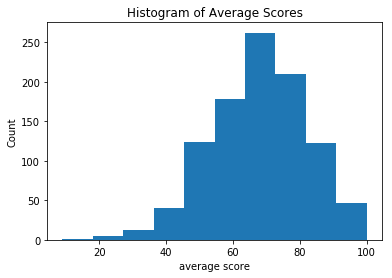



Average Scores: 
Jarque-Bera test statistic:  187.736108;    p value: 0.0
Normality test statistic:     112.45735;    p value: 3.803617355088952e-25


In [83]:
performance_df['average score'] = round(((performance_df['math score']+performance_df['reading score']+performance_df['writing score'])/3),2)

plt.hist(performance_df['average score'])
plt.title('Histogram of Average Scores')
plt.xlabel('average score')
plt.ylabel('Count')
plt.show()

print('\n')

jb_stats = jarque_bera(np.sqrt(performance_df['average score']))
norm_stats = normaltest(np.sqrt(performance_df['average score']))

print("Average Scores: ")
print("Jarque-Bera test statistic:  {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
print("Normality test statistic:     {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))


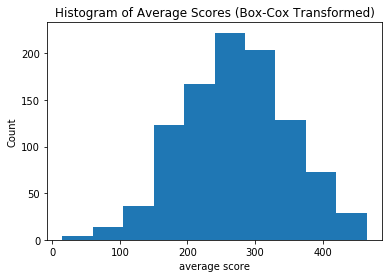



Average Scores Box-Cox: 
Jarque-Bera test statistic:  72.996341;    p value: 1.1102230246251565e-16
Normality test statistic:     58.424887;    p value: 2.056822873416227e-13


In [85]:
average_boxcox,_ = boxcox(performance_df['average score'][performance_df['average score']>0])  #Box Cox has issues if any values are <=0

# Histogram of the Box-Cox transformed data
plt.hist(average_boxcox)
plt.title("Histogram of Average Scores (Box-Cox Transformed)")
plt.xlabel('average score')
plt.ylabel('Count')
plt.show()

#Stats:
print('\n')

jb_stats = jarque_bera(np.sqrt(average_boxcox))
norm_stats = normaltest(np.sqrt(average_boxcox))

print("Average Scores Box-Cox: ")
print("Jarque-Bera test statistic:  {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
print("Normality test statistic:     {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))

Neither the original nor the Box-Cox transformation of the average test scores data provides a p-value much greater than 0, so in both cases, the data is not normally distributed.

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [86]:
performance_df.corr()

,math score,reading score,writing score,average score
math score,1.000000,0.817580,0.802642,0.918744
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965669
average score,0.918744,0.970331,0.965669,1.000000


In [108]:
#Convert string categorical variables to numerical dummies

new_df = performance_df.copy()

unique_gender = list(performance_df['gender'].unique())       #['female', 'male']

unique_race = list(performance_df['race/ethnicity'].unique())
unique_race.sort()   #Alphabetize                             #['group A', 'group B', 'group C', 'group D', 'group E']

unique_parentalEd = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree" ]

unique_lunch = list(performance_df['lunch'].unique())[::-1]    #['free/reduced', 'standard']

dummy_gender = []
for row in new_df['gender']:
    for i in range(len(unique_gender)):
        if row == unique_gender[i]:
            dummy_gender.append(i)
        
new_df['dummy gender'] = dummy_gender


dummy_race = []
for row in new_df['race/ethnicity']:
    for i in range(len(unique_race)):
        if row == unique_race[i]:
            dummy_race.append(i)
    
new_df['dummy race'] = dummy_race


dummy_parentalEd = []
for row in new_df['parental level of education']:
    for i in range(len(unique_parentalEd)):
        if row == unique_parentalEd[i]:
            dummy_parentalEd.append(i)
    
new_df['dummy parentalEd'] = dummy_parentalEd


dummy_lunch = []
for row in new_df['lunch']:
    for i in range(len(unique_lunch)):
        if row == unique_lunch[i]:
            dummy_lunch.append(i)
    
new_df['dummy lunch'] = dummy_lunch


In [109]:
new_df.corr()

,math score,reading score,writing score,average score,dummy gender,dummy race,dummy parentalEd,dummy lunch
math score,1.000000,0.817580,0.802642,0.918744,0.167982,0.216415,0.159432,0.350877
reading score,0.817580,1.000000,0.954598,0.970331,-0.244313,0.145253,0.190908,0.229560
writing score,0.802642,0.954598,1.000000,0.965669,-0.301225,0.165691,0.236715,0.245769
average score,0.918744,0.970331,0.965669,1.000000,-0.130868,0.185165,0.205789,0.290064
dummy gender,0.167982,-0.244313,-0.301225,-0.130868,1.000000,-0.001502,-0.043934,0.021372
dummy race,0.216415,0.145253,0.165691,0.185165,-0.001502,1.000000,0.095906,0.046563
dummy parentalEd,0.159432,0.190908,0.236715,0.205789,-0.043934,0.095906,1.000000,-0.023259
dummy lunch,0.350877,0.229560,0.245769,0.290064,0.021372,0.046563,-0.023259,1.000000


Although it might seem intuitive based on previous visualizations that average scores would have high correlation to parental education levels, race/ethnicity, lunch status, and/or gender, it appears that those variables have relatively low (~30%) correlations with average scores and individual scores. 